# Analiza ankiety przeprowadzonej wśród młodych Słowaków 

### Odkrywanie preferencji, zainteresowań, zwyczajów, opinii i obaw młodych ludzi w celu wskazania różnic i podobieńst pomiędzy życiem w mieście a życiem na wsi

#### Część 1: statystyka opisowa

##### Zaczniemy od analizy naszego zbioru daych, aby uzyskać pewne informacje na jego temat:

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils.math_functions import median, mean, stddev

%matplotlib inline

response_no = []
responders_ages = []
responders_heights = []
responders_weights = []


def read_age_from_csv():
    with open('resources/young-people-survey/responses.csv') as csv_file:
        read_csv = csv.reader(csv_file, delimiter=',')
        headers = []
        headers_read = False
        response_idx = 0
        for row in read_csv:
            if not headers_read:
                headers = row
                headers_read = True
                continue
            response_no.append(response_idx)
            try:
                responders_ages.append(int(row[headers.index("Age")]))
                responders_heights.append(int(row[headers.index("Height")]))
                responders_weights.append(int(row[headers.index("Weight")]))
            except ValueError:
                pass
            response_idx += 1

read_age_from_csv()
df = pd.read_csv('resources/young-people-survey/responses.csv')
df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


In [2]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


##### Podstawowe wielkości statystyczne opisujące wiek respondentów:

In [3]:
print("Average responder age is %f" % mean(responders_ages))
print("Median of responders age is %d" % median(responders_ages))
print("Standard deviation of responders age is %f" % stddev(responders_ages))

Average responder age is 20.433699
Median of responders age is 20
Standard deviation of responders age is 2.827430


Wykres pudełkowy opisujący wiek respondentów:

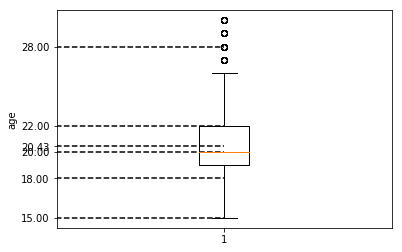

In [4]:
def show_responders_box_plot(data, ylabel):
    data_median = median(data)
    sub_data_Q1 = list(filter(lambda x: x < data_median, data))
    sub_data_Q3 = list(filter(lambda x: x > data_median, data))
    Q1 = median(sub_data_Q1)
    Q3 = median(sub_data_Q3)
    IQR = Q3 - Q1
    flier_low = max(min(data), Q1 - 1.5 * IQR)
    flier_high = max(min(data), Q3 + 1.5 * IQR)
    fig, ax = plt.subplots()
    ax.boxplot(data, showfliers=True)
    plt.hlines(y=[flier_high, mean(data), Q1, Q3, data_median, flier_low], xmin=0, xmax=1, colors='k',
               linestyles='dashed')
    plt.yticks([flier_high, Q1, Q3, mean(data), data_median, flier_low])
    plt.ylabel(ylabel)
    plt.show()

show_responders_box_plot(responders_ages, "age")

Histogram przedstawiający wiek respondentów:

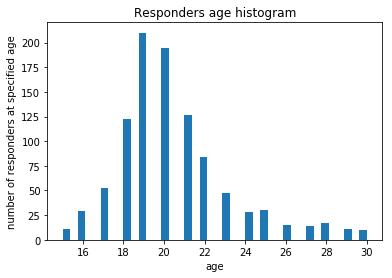

In [5]:
def show_responders_age_histogram(data, bin_count=40):
    plt.title("Responders age histogram")
    plt.xlabel("age")
    plt.ylabel("number of responders at specified age")
    plt.hist(data, bins=bin_count, range=(15, 30))
    plt.show()
   
show_responders_age_histogram(responders_ages)

##### Podstawowe wielkości statystyczne opisujące wzrost respondentów:

In [ ]:
print("Average responder height is %f" % mean(responders_heights))
print("Median of responders height is %d" % median(responders_heights))
print("Standard deviation of responders height is %f" % stddev(responders_heights))

#### Brakujące wartości:

Brakujące wartości są problematyczne, ponieważ nie wiemy, co było przyczyną tego, że respondenci nie wypełnili danego pola w ankiencie. Możliwe także, że braki pewnych wartości były wynikiem tego, że np. niektóre dane nie zostały przeniesione z ankiety do formularza cyfrowego.

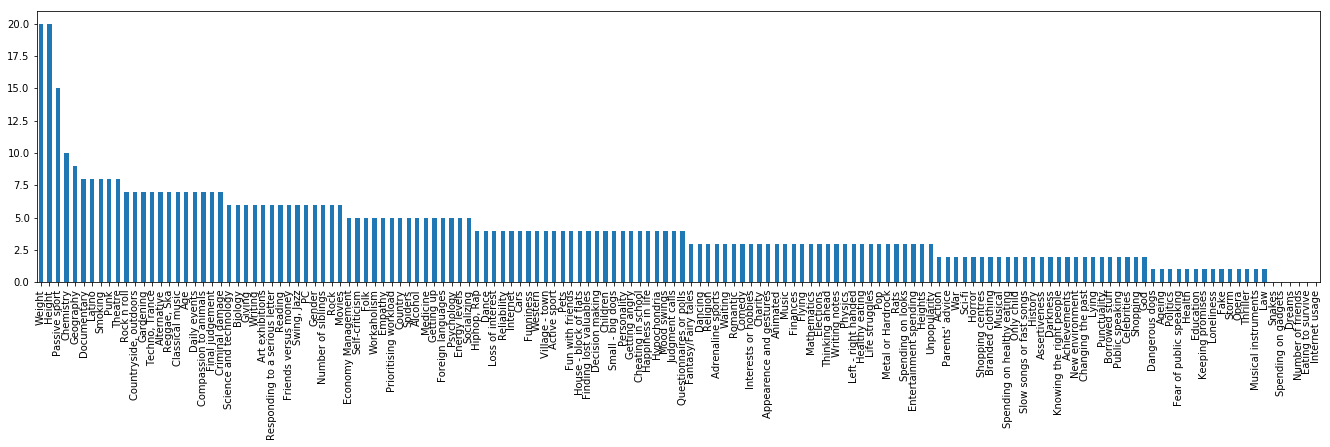

In [6]:
def display_missing_values(df):
    nulls = df.isnull().sum().sort_values(ascending=False)
    nulls.plot(kind='bar', figsize=(23, 5))
    plt.show()
    
display_missing_values(df)

In [7]:
def display_missing_values_info(df):
    print('Number of girls who omitted weight field: {:.0f}'.format(
        df[df['Gender'] == 'female']['Weight'].isnull().sum()))
    print('Number of boys who omitted weight field: {:.0f}'.format(
        df[df['Gender'] == 'male']['Weight'].isnull().sum()))
    print('Number of girls who omitted height field: {:.0f}'.format(
        df[df['Gender'] == 'female']['Height'].isnull().sum()))
    print('Number of boys who omitted height field: {:.0f}'.format(
        df[df['Gender'] == 'male']['Height'].isnull().sum()))
    
display_missing_values_info(df)

Number of girls who omitted weight field: 13
Number of boys who omitted weight field: 6
Number of girls who omitted height field: 13
Number of boys who omitted height field: 6


Powyższe dane wyglądają podejrzanie. W treści opisującej zbiór danych możemy znaleźć fragment: "In 2013, students of the Statistics class at FSEV UK were asked to invite their **friends** to participate in this survey.". Można zatem postawić hipotezę, iż młodzi słowaccy respondenci, wiedząc, że ich dane będą potem analizowane przez ich **przyjaciół**, nie dostarczyli takich danych jak waga, wiek czy wzrost, w obawie, że mogliby zostać przez swoich znajomych zidentyfikowani. Przyjrzymy się zatem im bliżej tym danym i spróbujmy zweryfikować tę hipotezę.

In [8]:
def display_missing_values_further_info(df):
    omitted = df[(df['Weight'].isnull()) | df['Height'].isnull()]
    print('Number of people with omitted Weight or Height: {:.0f}'.format(omitted.shape[0]))
    nas = omitted.drop(['Weight', 'Height', 'Number of siblings', 'Age'], 1).isnull().sum().sum()
    print('Number of fields that were omitted by people who did not fill Weight or Height: {:.0f}'.format(nas))
    
display_missing_values_further_info(df)

Number of people with omitted Weight or Height: 30
Number of fields that were omitted by people who did not fill Weight or Height: 18


Zauważmy, że Ci repondenci, którzy pominęli w ankiecie takie pola jak waga, wiek, wzrost lub liczbę posiadanego rodzeństwa pominęli także 18 innych pól w nakiecie, co może świadczyć o słyszności postawionej wcześniej hipotezy co do obawy respondentów przed identyfikacją przez znajomych. W dalszej części przypiszemy brakujące wartości.

Analizowany przez na zbiór danych pozwala na zdefiniowanie wielu celów analizy danych. Z tego względu spojrzeliśmy na dane pod takim kątem, aby podjąć próbę wskazania różnic i podobieńst pomiędzy życiem w mieście a życiem na wsi (bazując na odpowiedziach respondentów). 
Z tego powodu **opuścimy rekordy, które nie mają wartości w kolumnie o nazwie "Village - town"**.

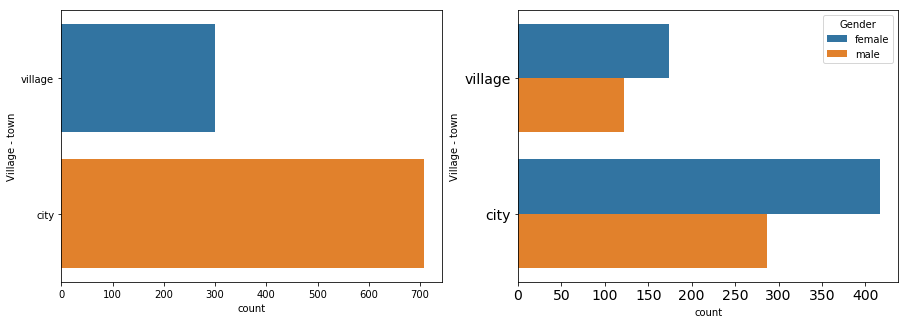

In [9]:
def drop_rows_without_values_and_display_village_vs_city_stats(column_name, df):
    interesting_var = column_name
    mapping = {interesting_var: {'city': 0, 'village': 1}}
    df.dropna(subset=[interesting_var], inplace=True)
    # to have ability to use hue parameter in seaborn for better comparison
    df["all"] = ""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.countplot(y=interesting_var, data=df, ax=ax[0])
    sns.countplot(y=interesting_var, hue='Gender', data=df, ax=ax[1])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    return interesting_var

interesting_var = drop_rows_without_values_and_display_village_vs_city_stats('Village - town', df)

Jak widzimy, powyższe klasy są bardzo niezbalansowane (przeszło dwa razy więcej respondentów mieszkało w mieście). Gdybyśmy przygotowywali dane pod zbiór testowy i treningowy do jakiegoś algorytmu ML, to ów brak balansu może być problematyczny.

#### Dane odstające

Zwróćmy w tym miejscu uwagę, czy występują jakieś różnice pod względem wagi, wzrosti czy wieku pomiędzy respondentami zamieszkującymi wieś i miasto. 

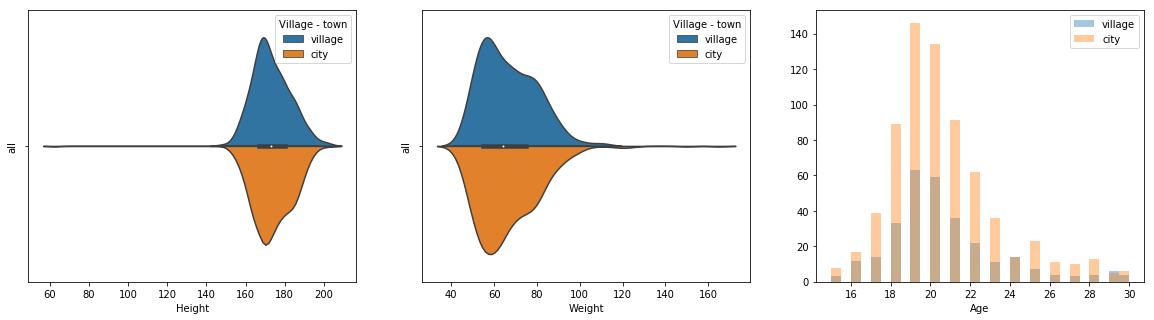

In [10]:
def city_vs_village_height_weight_age_comparison(df, interesting_var):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    data = df.dropna(subset=['Height'])
    sns.violinplot(x='Height', y="all", hue=interesting_var, data=data, split=True, ax=ax[0]);
    data = df.dropna(subset=['Weight'])
    sns.violinplot(x='Weight', y="all", hue=interesting_var, data=data, split=True, ax=ax[1]);
    interesting_var_ser = df[interesting_var]
    sns.distplot(df[interesting_var_ser == 'village'].Age.dropna(),
                 label='village', ax=ax[2], kde=False, bins=30)
    sns.distplot(df[interesting_var_ser == 'city'].Age.dropna(),
                 label='city', ax=ax[2], kde=False, bins=30)
    ax[2].legend()
    plt.show()
    
city_vs_village_height_weight_age_comparison(df, interesting_var)

Jak możemy zaobserwować występują pewne dane odstające, które zaburzają wizualizacje.

In [11]:
def some_outliers_display(df, interesting_var):
    display(df[df['Height'] < 65][['Age', 'Height', 'Weight', 'Gender', interesting_var]])
    print()
    display(df[df['Weight'] > 115][['Age', 'Height', 'Weight', 'Gender', interesting_var]])
    
some_outliers_display(df, interesting_var)

,Age,Height,Weight,Gender,Village - town
676,20.0,62.0,55.0,female,city


,Age,Height,Weight,Gender,Village - town
292,21.0,184.0,120.0,female,city
793,24.0,185.0,120.0,male,city
859,20.0,190.0,125.0,male,city
885,23.0,NaN,165.0,female,city
973,20.0,175.0,120.0,female,city
992,30.0,200.0,150.0,male,city


Analizując powyższe tabele, należy także poważnie rozważyć hipotezę, że respondenci mogli pomylić rubryki i wpisać w pole 'Height' swoją wagę a w pole 'Weight' wpisać wzrost. Przykładowo **pozycja o indeksie 885 w drugiej z tabel nie zawiera wartości w polu 'Height' i zawiera wartość 165 kg w polu 'Weight'**, co może wskazywać na to, że kobieta wypełniająca ankietę omyłkowo wpisała swój wzrost w rubryce, w której powinna wpisać wagę.

Zaprezentowane dane odstające zostaną wykluczone z dalszej analizy.

In [12]:
def drop_outliers(df):
    df.drop([676, 292, 793, 859, 885, 973, 992], inplace=True)
    
drop_outliers(df)

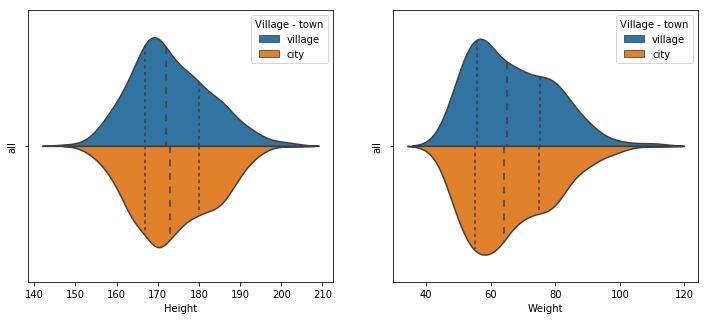

In [13]:
def city_vs_village_height_weight_age_comparison_after_outliers_drop(df, interesting_var):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    data = df.dropna(subset=['Height'])
    sns.violinplot(x='Height', y="all", hue=interesting_var, data=data,
                   split=True, ax=ax[0], inner='quartile')

    data = df.dropna(subset=['Weight'])
    sns.violinplot(x='Weight', y="all", hue=interesting_var, data=data,
                   split=True, ax=ax[1], inner='quartile')
    
city_vs_village_height_weight_age_comparison_after_outliers_drop(df, interesting_var)

Linie horyzontalne na powyższych wykresach oznaczają kwartyle.